# LEGO Regression Project

## Introduction 

In this notebook I will perform a simple linear regression analysis and report the findings of your model, including both predictive model performance metrics and interpretation of fitted model parameters.

## Skills showcase

* Write an SQL query to pull data from an SQL database
* Use Python to clean, manipulate and visualise data
* Perform a simple linear regression analysis 
* Evaluate the model and interpret its predictive performance metrics
* Apply an inferential lens to interpret relationships between variables identified by the model

# Task: Develop a LEGO Pricing Algorithm

![pile of legos](images/legos.jpg)

Photo by <a href="https://unsplash.com/@xavi_cabrera?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Xavi Cabrera</a> on <a href="/s/photos/lego?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## Business Understanding

This project is going to be to develop a pricing algorithm in order to analyze the value of individual lego pieces.

The primary purpose of this algorithm is *inferential*, meaning that **the model should be able to tell us something about the relationship betyouen the attributes of a LEGO set and its price**.


## Data Understanding

We have been given access to an sql database containing over 700 LEGO sets released in the past, including attributes of those sets as youll as their prices.


## Loading the Data

The database for this project is stored at the path `data/legos.db` in this project repository. The entity relational diagram (E.R.D) for the legos database is displayed below. 

To load in the data, you will need to complete the following tasks:
- Open up a connection to the legos database
- Write an sql query to join all three tables together
- Run the sql query and load the joined tables into a pandas dataframe


![Entity Relational Diagram](images/erd.png)

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!ls

CONTRIBUTING.md  images       index.ipynb		LICENSE.md
data		 index_files  Lego_dataset_cleaned.csv	README.md


In [6]:
conn = sqlite3.connect('data/legos.db')

sql_query = """
SELECT *
FROM product_info as p
JOIN difficulty as d
    ON d.`Prod Id` = p.`Prod Id`
JOIN metrics as m
    ON p.`Prod Id` = m.`Prod Id`
;"""
df = pd.read_sql(sql_query, conn)

In [7]:
df.nunique()

Prod Id             744
Set Name            734
Prod Desc           724
Theme Name           39
Piece Count         445
Prod Id             744
Min Age              13
Max Age               9
Difficulty Level      5
Prod Id             744
Num Reviews          82
Star Rating          27
List Price           68
dtype: int64

## Analysis Requirements

### 1. Data Exploration and Cleaning

During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases) should be dropped. 

### 2. Create a Baseline Model

In order to evaluate how youll a simple linear regression model is understanding the dependent variable, you will begin by first creating a model that predicts the mean of the dependent variable for every observation. Predicting the mean of `list_price` can be considered a highly naive model. If our simple linear regression model performs worse than this naive approach, you can safely say that it is not a very good model. 

### 3. Interpret a Correlation Heatmap

To develop a simple linear regression model, you will identify the independent variable that is most correlated with our dependent variable. To do this this you will plot a correlation heatmap to identify the variable most correlated with `list_price`.

### 4. Build a Simple Linear Regression Model

Now, create a linear regression model using the `statsmodels` library where the most correlated feature is used as the independent variable and the dependent variable is properly set. 

### 5. Interpret the Simple Linear Regression Model

Once the model has been fit, the coefficient for our independent variable, its p-value, and the coefficient confidence interval should be interpeted. You should ask ourselves whether or not the relationship your model is finding seems plausible. 

### 6. Evaluate the Simple Linear Regression Model

Before you can make a final assessment of our model, you need to compare its metrics with the baseline model created in step one, and you need to check the assumptions of linear regression.


# 1. Data Exploration and Cleaning

During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases) should be dropped. 

In [8]:
df.head()

,Prod Id,Set Name,Prod Desc,Theme Name,Piece Count,Prod Id,Min Age,Max Age,Difficulty Level,Prod Id,Num Reviews,Star Rating,List Price
0,60123,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,60123,7.0,12.0,1,60123,3.0,4.3,$49.99
1,71246,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,71246,7.0,14.0,1,71246,3.0,4.7,$30.362
2,10616,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,10616,1.5,5.0,1,10616,3.0,5.0,$19.99
3,31079,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,31079,8.0,12.0,1,31079,5.0,4.4,$34.99
4,42057,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,42057,8.0,14.0,1,42057,9.0,4.7,$19.99


Produce high-level descriptive information about your training data

In [9]:
df.describe()

,Prod Id,Piece Count,Prod Id,Min Age,Max Age,Difficulty Level,Prod Id,Num Reviews,Star Rating
count,8.840000e+02,884.000000,8.840000e+02,884.000000,884.000000,884.000000,8.840000e+02,781.000000,781.000000
mean,5.821184e+04,460.990950,5.821184e+04,6.781674,27.785068,1.483032,5.821184e+04,17.610755,4.430602
std,1.388029e+05,928.905788,1.388029e+05,2.984551,34.019566,0.796898,1.388029e+05,38.143280,0.592083
min,6.300000e+02,1.000000,6.300000e+02,1.500000,3.000000,0.000000,6.300000e+02,1.000000,1.800000
25%,2.113875e+04,88.750000,2.113875e+04,5.000000,12.000000,1.000000,2.113875e+04,2.000000,4.100000
50%,4.550550e+04,185.500000,4.550550e+04,7.000000,14.000000,2.000000,4.550550e+04,6.000000,4.600000
75%,7.122825e+04,457.750000,7.122825e+04,8.000000,14.000000,2.000000,7.122825e+04,13.000000,4.900000
max,2.000431e+06,7541.000000,2.000431e+06,16.000000,99.000000,4.000000,2.000431e+06,367.000000,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prod Id           884 non-null    int64  
 1   Set Name          884 non-null    object 
 2   Prod Desc         864 non-null    object 
 3   Theme Name        884 non-null    object 
 4   Piece Count       884 non-null    int64  
 5   Prod Id           884 non-null    int64  
 6   Min Age           884 non-null    float64
 7   Max Age           884 non-null    float64
 8   Difficulty Level  884 non-null    int64  
 9   Prod Id           884 non-null    int64  
 10  Num Reviews       781 non-null    float64
 11  Star Rating       781 non-null    float64
 12  List Price        844 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 89.9+ KB


Display the number of null values for each column

In [11]:
df.isna().sum()

Prod Id               0
Set Name              0
Prod Desc            20
Theme Name            0
Piece Count           0
Prod Id               0
Min Age               0
Max Age               0
Difficulty Level      0
Prod Id               0
Num Reviews         103
Star Rating         103
List Price           40
dtype: int64

You have four columns that contain null values. Of those four, `List Price`, which is your dependent variable, is probably the most concerning. 

In the cell below, drop all rows where `List Price` is null.

In [12]:
df = df.dropna(subset=['List Price'])

In [13]:
df.isna().sum()

Prod Id              0
Set Name             0
Prod Desc           20
Theme Name           0
Piece Count          0
Prod Id              0
Min Age              0
Max Age              0
Difficulty Level     0
Prod Id              0
Num Reviews         95
Star Rating         95
List Price           0
dtype: int64

Reformat the column names so spaces have been replaced with underscores and the text has been lowered

In [14]:
mycolnames = []
for col in df.columns:
    mycolnames.append(col.lower().replace(" ", "_"))
    
df = df.rename(columns= dict(zip(df.columns, mycolnames,)))

In [15]:
df.columns

Index(['prod_id', 'set_name', 'prod_desc', 'theme_name', 'piece_count',
       'prod_id', 'min_age', 'max_age', 'difficulty_level', 'prod_id',
       'num_reviews', 'star_rating', 'list_price'],
      dtype='object')

Check if we run the code correctly by assert check.

In [16]:
assert 'min_age' in df.columns

Check the datatypes of the columns in the dataframe. 
> Remember, the target column and any columns you use as independent variables *must* have a numeric datatype. After inspecting the datatypes of the columns, convert columns to numeric where necessary. 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 881
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           844 non-null    int64  
 1   set_name          844 non-null    object 
 2   prod_desc         824 non-null    object 
 3   theme_name        844 non-null    object 
 4   piece_count       844 non-null    int64  
 5   prod_id           844 non-null    int64  
 6   min_age           844 non-null    float64
 7   max_age           844 non-null    float64
 8   difficulty_level  844 non-null    int64  
 9   prod_id           844 non-null    int64  
 10  num_reviews       749 non-null    float64
 11  star_rating       749 non-null    float64
 12  list_price        844 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 92.3+ KB


In [18]:
df['list_price'] = pd.to_numeric(df['list_price'].str.replace('[^.0-9]', ''))

/tmp/ipykernel_66/2178616088.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['list_price'] = pd.to_numeric(df['list_price'].str.replace('[^.0-9]', ''))


In [19]:
df.head()

,prod_id,set_name,prod_desc,theme_name,piece_count,prod_id,min_age,max_age,difficulty_level,prod_id,num_reviews,star_rating,list_price
0,60123,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,60123,7.0,12.0,1,60123,3.0,4.3,49.990
1,71246,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,71246,7.0,14.0,1,71246,3.0,4.7,30.362
2,10616,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,10616,1.5,5.0,1,10616,3.0,5.0,19.990
3,31079,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,31079,8.0,12.0,1,31079,5.0,4.4,34.990
4,42057,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,42057,8.0,14.0,1,42057,9.0,4.7,19.990


In the cell below, output the number of duplicate rows in the dataframe. If duplicates are found, drop them.

In [20]:
df.duplicated().sum()

100

In [21]:
df = df.drop_duplicates()

In [22]:
df = df.loc[:,~df.columns.duplicated()]

Visualize the distribution of the dependent variable

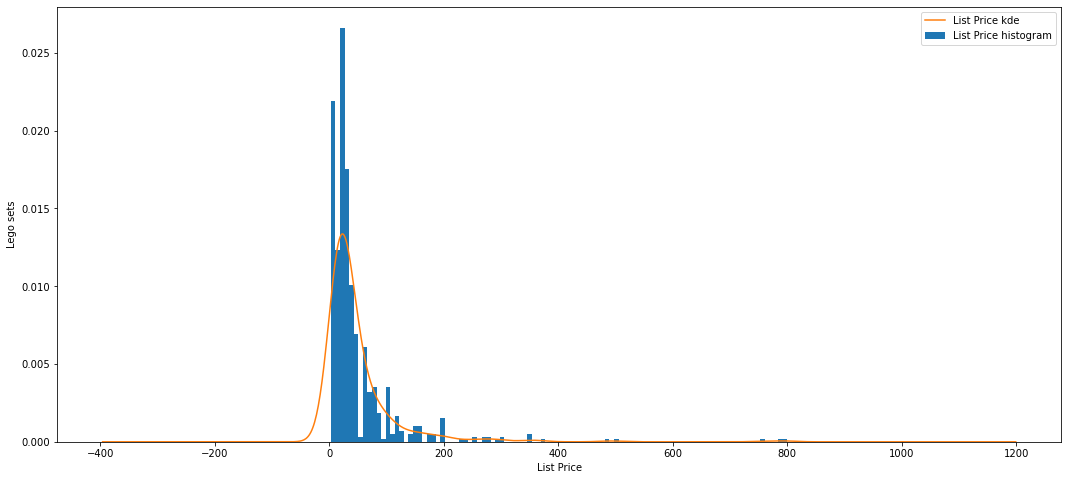

In [23]:
fig, ax = plt.subplots(figsize = (18,8))
df.list_price.plot.hist(density = True, label='List Price histogram', bins=100)
df.list_price.plot.kde(label='List Price kde')
ax.set_xlabel("List Price")
ax.set_ylabel("Lego sets")
ax.legend();

In [21]:
df.list_price.describe()

count    744.000000
mean      49.000582
std       73.651661
min        2.490000
25%       14.990000
50%       29.990000
75%       49.990000
max      799.990000
Name: list_price, dtype: float64

# Create a Baseline Model

Creating a baseline model. 


1. Calculate the mean of the `list_price` column in the `train` dataframe.
2. Now that you've calculate the mean of `list_price`, create a list with the same length as the `list_price` column where every value in the list is the calculated mean.
    - Store this list in the variable `baseline_preds`.

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [23]:
train.list_price.mean()

48.6109317647064

In [26]:
# Calculate the mean of the list_price column in the train dataframe.
mean = train.list_price.mean()

# Create a list with the same length as the list_price column 
# where every value in the list is the calculated mean.

baseline_preds = []
for price in train.list_price:
    baseline_preds.append(mean)

In [27]:
print(len(baseline_preds))
print(len(train.list_price))

595
595


In [28]:
from sklearn.metrics import r2_score, mean_squared_error

# Pass the list_price column and the baseline_preds list into the function r2_score
baseline_r2 = r2_score(train.list_price, baseline_preds)

# Pass the list_price column and the baseline_preds list 
# into the function mean_squared_error and setting squared to False


baseline_rmse = mean_squared_error(train.list_price, baseline_preds, squared=False)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)

Baseline R^2:  0.0
Baseline RMSE: 72.84078918829029


**Interpret the resulting metrics for the baseline model.**

- How is the model explaining the variance of the dependent variable?
- On average, how many dollars off are the models predictions?

The baseline model doesnt explain any of the variance with a r2 of 0.
The baseline model's dollar error is at 72.8 which is pretty high considering our mean price is around 48.6

# 2. Interpret a Correlation Heatmap to Build a Baseline Model

## Correlation Heatmap

Produce a heatmap showing the correlations between all of the numeric values in the data. The x and y axis labels should indicate the pair of values that are being compared, and then the color and the number should represent the correlation. 

The most important column or row shows the correlations betyouen the target (listing price) and other attributes.

In [29]:
import seaborn as sns
import numpy as np

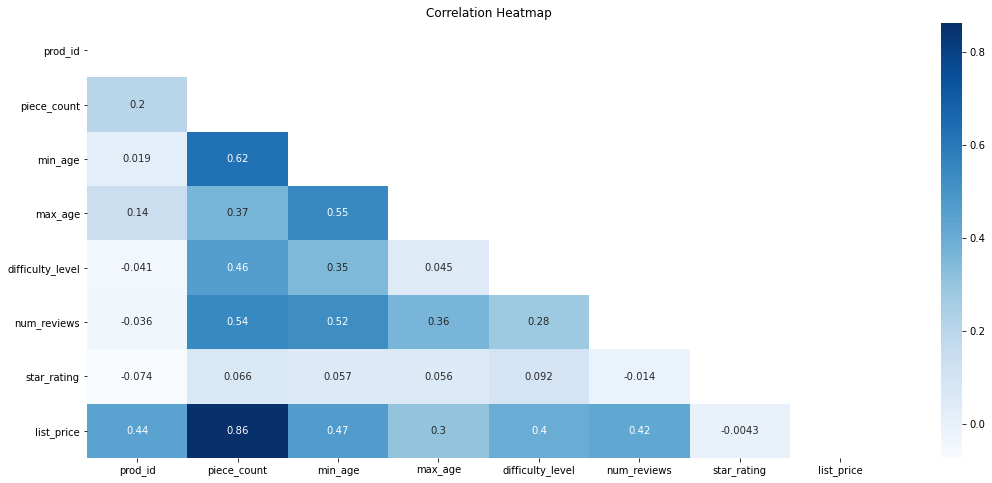

In [30]:
fig, ax = plt.subplots(figsize = (18, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap='Blues', annot=True, mask=mask).set(title="Correlation Heatmap");

Based on the heatmap, which feature is most strongly correlated with the target (`list_price`)? In other words, which feature has the strongest positive or negative correlation — the correlation with the greatest magnitude?

In [31]:
most_correlated_feature = 'piece_count'

Create a scatter plot of that feature vs. listing price:

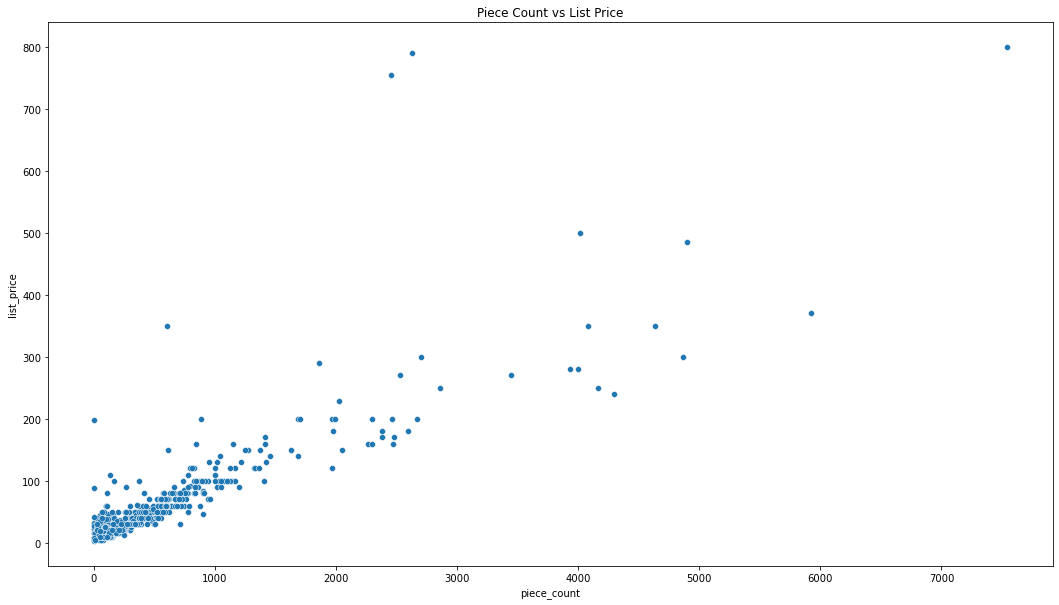

In [32]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.scatterplot(x = most_correlated_feature, y='list_price', data=df).set(title="Piece Count vs List Price");

Assuming you correctly identified `piece_count` (the number of pieces in the LEGO set) as the most correlated feature, you should have a scatter plot that shows a fairly clear linear relationship betyouen that feature and the target. It looks like you are ready to proceed with creating a simple linear regression model.

# 3. Build a Simple Linear Regression Model

Now, you'll build a linear regression model using just that feature. 

In the cell below, fit a statsmodels linear regression model to the data and output a summary for the model. 

In [33]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
f = 'list_price~piece_count'
model = ols(formula=f, data=train).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1332.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          8.91e-154
Time:                        06:13:24   Log-Likelihood:                -3045.4
No. Observations:                 595   AIC:                             6095.
Df Residuals:                     593   BIC:                             6104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2949      1.954      6.292      0.000       8.457      16.133
piece_count     0.0858      0.002     36.501      0.000       0.081       0.090
==============================================================================
Omnibus:                      922.696   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320256.650
Skew:                           8.778   Prob(JB):                         0.00
Kurtosis:                     115.293   Cond. No.                         978.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model.conf_int(alpha=0.05, cols=None)
#another way of checking confidence intervals separately

,0,1
Intercept,8.457236,16.132599
piece_count,0.081221,0.090459


# 4. Interpret the Simple Linear Regression Model

Now that the model has been fit, you should interpret the model parameters. 

Specifically:
- What do the coefficients for the intercept and independent variable suggest about the dependent variable?
- Are the coefficients found to be statistically significant?
- What are the confidence intervals for the coefficients?
- Do the relationships found by the model seem plausible? 

1. Our R squared of 0.691 means that our model explains 69.1% of the variance in our List Price variable.
2. That R2 value of 0.691 is statistically significant. With a p value of 0.00 we can sucessfully reject the Null hypothesis
3. The confidence interval for the intercept is between 8.457 and 16.133. The confidence interval for piece_count is between 0.081 and 0.090.
4. The relationships found by the model is plausible because we have found the relationships to be statistically significant. We can reject the null hypothesis based on the low P values.

# 5. Evaluate the Simple Linear Regression Model

Now that the model parameters have been interpreted, the model must be assessed based on predictive metrics and whether or not the model is meeting the assumptions of linear regression. 

### Compare the $R^2$ and the Root Mean Squared Error of the simple linear regression model with the baseline model. 

In [38]:
from statsmodels.tools.eval_measures import rmse

model_r2 = model.rsquared
ypred = model.predict(test.piece_count)
model_rmse = rmse(test.list_price, ypred)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('----------------------------')
print('Regression R^2: ', model_r2)
print('Regression RMSE:', model_rmse)

Baseline R^2:  0.0
Baseline RMSE: 72.84078918829029
----------------------------
Regression R^2:  0.692000871519727
Regression RMSE: 21.057485629006923


### Interpret the model metrics

In comparing the two models' R2 and RMSE, we can be confident that the model that we built is a better fit than the baseline model.

### Check the assumptions of simple linear regression

#### Investigating Linearity

First, let's check whether the linearity assumption holds.

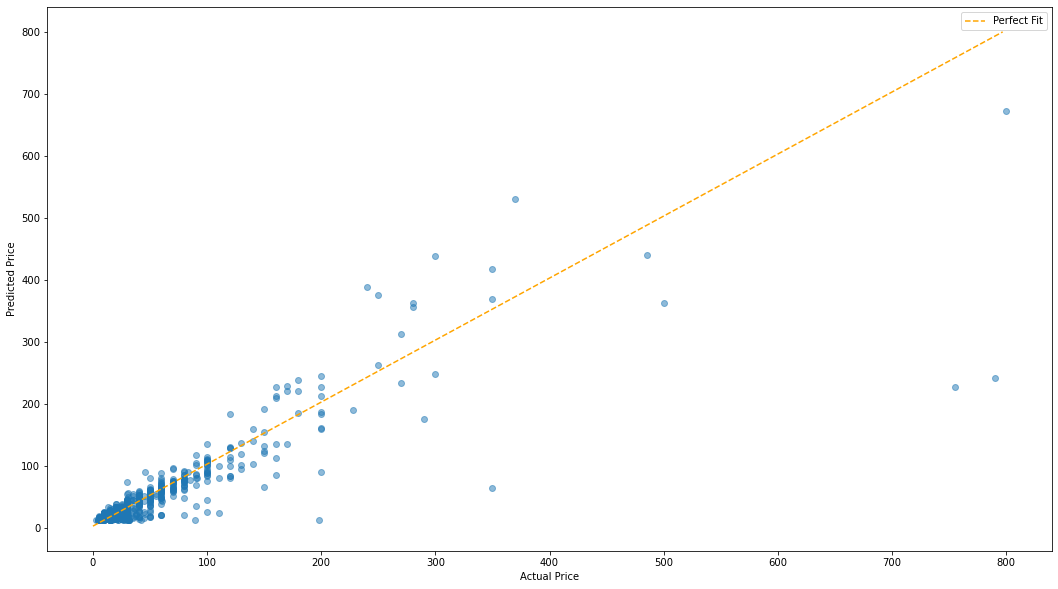

In [76]:
# Run this cell without changes

preds = model.predict()
fig, ax = plt.subplots(figsize=(18,10))

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are you violating the linearity assumption?

Based on the visualisation, we can assume linearity. There are however, quite a few  outliers that might affect the accuracy of our model.

#### Investigating Normality

Now let's check whether the normality assumption holds for our model.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


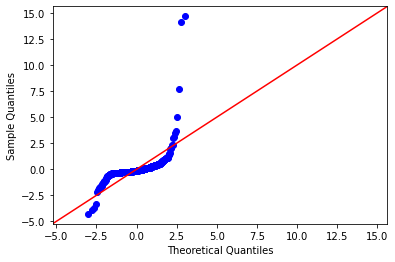

In [35]:
# Run this code without changes
import scipy.stats as stats
import statsmodels.api as sm

residuals = (df.list_price - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are you violating the normality assumption?

The outliers that we've mentioned earlier is causing our dataset to violate the normality assumption. We should clean up the dataset and see if it can assume the normality assumption without the outliers.

#### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

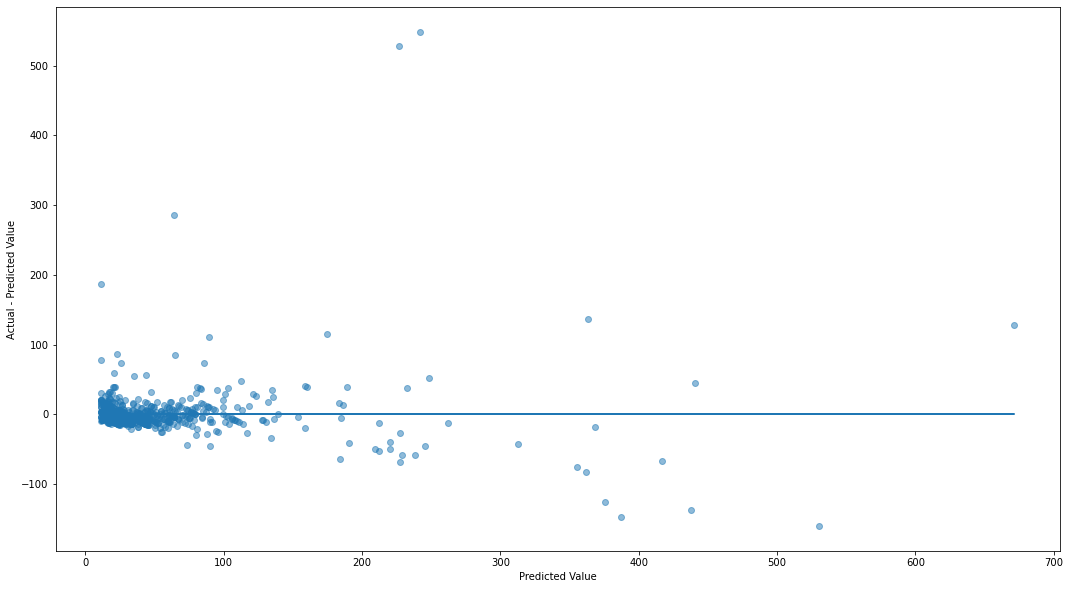

In [80]:
# Run this cell without changes
fig, ax = plt.subplots(figsize=(18,10))

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are you violating the homoscedasticity assumption?

Baseed on our visualization, our outliers are causing it to make a slight funnel shape and therefore violate the assumption of homoscedasticity. We should remove the outliers to make sure we don't violate homoskedasticity.

### Linear Regression Assumptions Conclusion

Our model's coefficients are pretty strong compared to our baseline model. However, we are violating some of the assumptions for linear regression. We should clean up the dataset to remove the outliers and see if the improved model can be used for both inferential and predictive purposes.